# 서울 열린데이터 과장 https://data.seoul.go.kr --> '서울특별시 공공자전거 대여이력 정보' 검색
# 2024년 1분기 데이터 다운로드 받기(2024.01 ~ 03)

Q1. 일(day)별 자전거 이용건수는 어떻게 될까?
Q2. 대여시간대별, 요일별 자전거 이용건수는 어떻게 될까?
Q3. 주말, 평일 이용건수는 어떻게 될까?
Q4. 인기명소는 어디일까?

In [3]:
# 데이터 불러오기, 데이터 병합

import pandas as pd
bikes_temp={}

for i in range(1,4):        #i = 1,2,3
    bikes_temp[i]=pd.read_csv(f'data\서울특별시 공공자전거 대여이력 정보_240{i}.csv',encoding='cp949')

In [ ]:
for i in range(1,4):
    print(bikes_temp[i].shape)

In [20]:
bikes = pd.concat(bikes_temp,ignore_index=True)


In [ ]:
bikes.index

In [ ]:
bikes.head(3)

In [ ]:
bikes.info()

* 날짜 데이터 변경 : pd.to_datetime(변수명)
* dt 액세서
  - 변수명.dt.year
  - 변수명.dt.month
  - 변수명.dt.hour
  - 변수명.dt.weekday(요일 0 ~ 6 :월 ~ 일)

In [ ]:
# 일자별, 요일별, 주말구분별, 대여시간대별 따릉이 이용건수 파익
# 대여일, 일자, 요일, 대여시간대, 주말구분 컬럼 추가

bikes['대여일'] = pd.to_datetime(bikes['대여일시'])
bikes.info()

In [25]:
# 월, 일자, 시간대 컬럼 추가
bikes['월'] = bikes['대여일'].dt.month
bikes['일자'] = bikes['대여일'].dt.day
bikes['시간대'] = bikes['대여일'].dt.hour

In [ ]:
bikes.info()

In [ ]:
bikes['요일_n'] = bikes['대여일'].dt.weekday
bikes['요일_n'].unique()

In [ ]:
bikes['요일_n'].value_counts().sort_index()

In [ ]:
bikes.tail()

In [ ]:
# 요일 컬럼 생성
weekdays={0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
bikes['요일']=bikes['요일_n'].map(weekdays)
bikes['요일'].unique()

In [ ]:
# 주말구분 열 생성
weekend={'월':'평일','화':'평일','수':'평일','목':'평일','금':'평일','토':'주말','일':'주말'}
bikes['주말구분']=bikes['요일'].map(weekend)
bikes['주말구분'].value_counts()


*일자별 따릉이 이용건수

In [ ]:
# 1월 일자별 대여현황
dayly_ride_01 = bikes.query('월==1').groupby('일자',as_index=False)[['자전거번호']].count()
dayly_ride_01.head()

In [ ]:
dayly_ride_02 = bikes.query('월==2').groupby('일자',as_index=False)[['자전거번호']].count()
dayly_ride_02.head()

In [ ]:
dayly_ride_03 = bikes.query('월==3').groupby('일자',as_index=False)[['자전거번호']].count()
dayly_ride_03.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 서브플롯 생성
fig, axes = plt.subplots(1,3,figsize=(15,3))
# plt.figure(figsize=(7,3))
sns.barplot(data=dayly_ride_01, x='일자',y='자전거번호',ax=axes[0])
sns.barplot(data=dayly_ride_02, x='일자',y='자전거번호',ax=axes[1])
sns.lineplot(data=dayly_ride_03, x='일자',y='자전거번호',ax=axes[2])

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()


In [80]:
# 대여시간대별 따릉이 이용건수

hourly_ride = bikes.groupby('시간대',as_index=False)[['자전거번호']].count()
hourly_ride

,시간대,자전거번호
0,0,145982
1,1,106044
2,2,72061
3,3,53001
4,4,44513
5,5,76185
6,6,163283
7,7,362664
8,8,572957
9,9,334557


In [78]:
# 요일별 따릉이 인원수
weekday_ride = bikes.groupby('요일',as_index=False)[['자전거번호']].count()
weekday_ride

,요일,자전거번호
0,금,1146668
1,목,1147832
2,수,1173864
3,월,977123
4,일,883904
5,토,987407
6,화,1088280


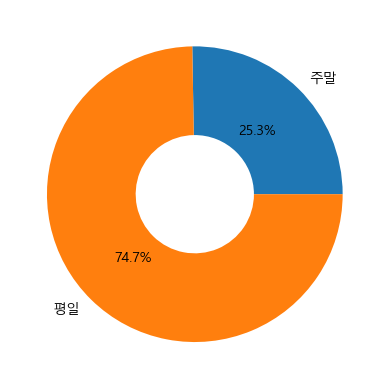

In [90]:
# 주말구분별 따릉이 인원수 : 파이(원)
weekend_ride = bikes.groupby('주말구분',as_index=False)[['자전거번호']].count()
weekend_ride

plt. pie(weekend_ride['자전거번호'],labels=weekend_ride['주말구분'],autopct='%.1f%%',wedgeprops={'width':0.6});

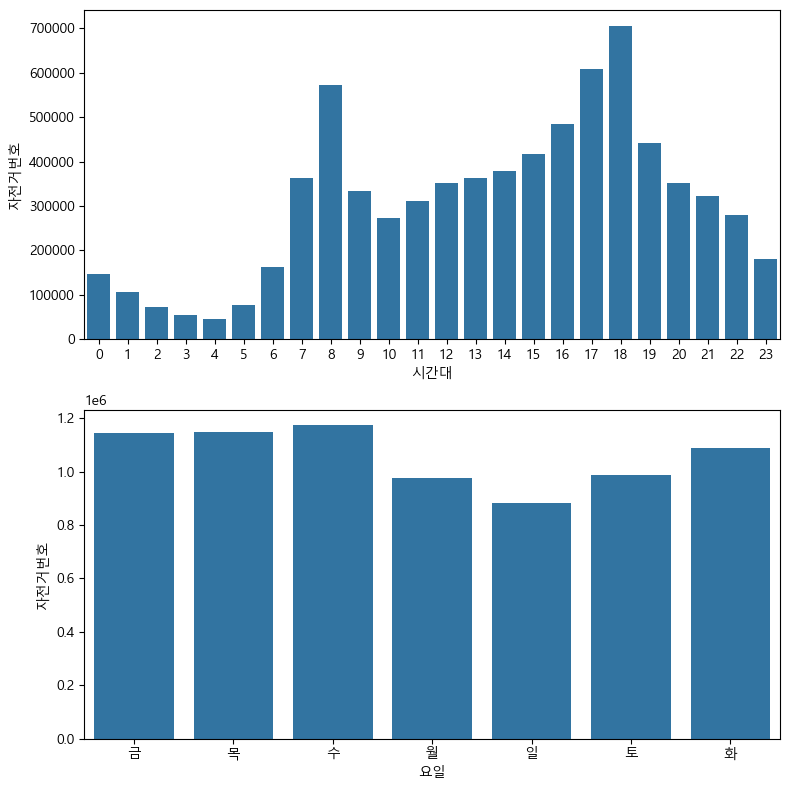

In [89]:
fig, axes = plt.subplots(2,1,figsize=(8,8))
# plt.figure(figsize=(7,3))
sns.barplot(data=hourly_ride, x='시간대',y='자전거번호',ax=axes[0])
sns.barplot(data=weekday_ride, x='요일',y='자전거번호',ax=axes[1])

#그래프 간 간격 조정
plt.tight_layout()
plt.show()

In [91]:
# 대여시간대별 & 요일별 이용건수

hourly_weekday_ride = bikes.groupby(['시간대','요일'],as_index=False)[['자전거번호']].count()
hourly_weekday_ride.head()

,시간대,요일,자전거번호
0,0,금,23351
1,0,목,20715
2,0,수,20657
3,0,월,15891
4,0,일,23361


<Axes: xlabel='시간대', ylabel='자전거번호'>

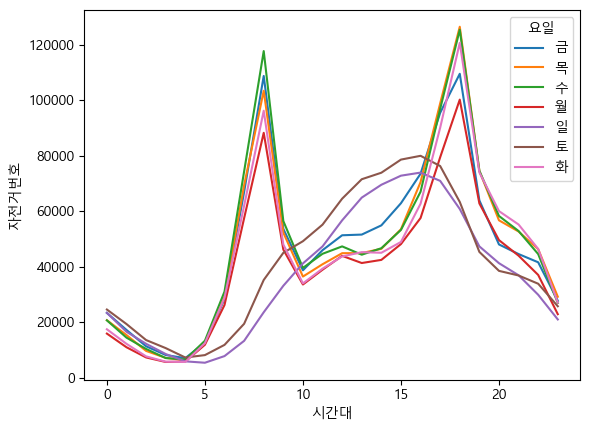

In [93]:
sns.lineplot(data=hourly_weekday_ride, x='시간대',y='자전거번호',hue='요일')

In [105]:
hourly_weekday_ride2 = bikes.pivot_table(index='시간대',columns='요일',values='자전거번호',aggfunc='count')

# 열 순서를 지정하여 재정렬
hourly_weekday_ride2 = hourly_weekday_ride2.reindex(columns=['월','화','수','목','금','토','일'])
hourly_weekday_ride2


요일,월,화,수,목,금,토,일
시간대,,,,,,,
0,15891,17445,20657,20715,23351,24562,23361
1,10968,12197,14435,15369,17204,19326,16545
2,7293,7679,10355,9649,11316,13558,12211
3,5661,5773,7070,7143,8168,10661,8525
4,5823,5667,6533,6301,7037,7268,5884
5,11864,12452,13316,12380,12646,8138,5389
6,26191,28854,31027,29267,28336,11822,7786
7,57457,61946,74315,69323,66935,19417,13271
8,88228,96193,117672,103379,108701,35210,23574


<Axes: xlabel='요일', ylabel='시간대'>

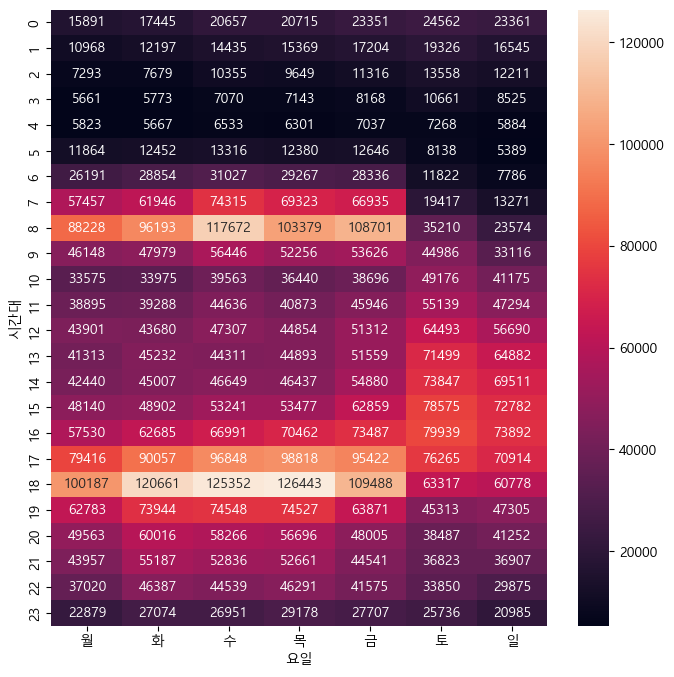

In [108]:
plt.figure(figsize=(8,8))
sns.heatmap(data=hourly_weekday_ride2,annot=True,fmt='d')

In [110]:
hourly_weekday_ride_3 = bikes.groupby(['시간대','요일'])[['자전거번호']].count().unstack()
hourly_weekday_ride_3

자전거번호                                              
요일        금       목       수       월      일      토       화
시간대                                                      
0     23351   20715   20657   15891  23361  24562   17445
1     17204   15369   14435   10968  16545  19326   12197
2     11316    9649   10355    7293  12211  13558    7679
3      8168    7143    7070    5661   8525  10661    5773
4      7037    6301    6533    5823   5884   7268    5667
5     12646   12380   13316   11864   5389   8138   12452
6     28336   29267   31027   26191   7786  11822   28854
7     66935   69323   74315   57457  13271  19417   61946
8    108701  103379  117672   88228  23574  35210   96193
9     53626   52256   56446   46148  33116  44986   47979
10    38696   36440   39563   33575  41175  49176   33975
11    45946   40873   44636   38895  47294  55139   39288
12    51312   44854   47307   43901  56690  64493   43680
13    51559   44893   44311   41313  64882  71499   45232
14    54880   46437   46649   42440  69511  73847   45007
15    62859   53477   53241   48140  72782  78575   48902
16    73487   70462   66991   57530  73892  79939   62685
17    95422   98818   96848   79416  70914  76265   90057
18   109488  126443  125352  100187  60778  63317  120661
19    63871   74527   74548   62783  47305  45313   73944
20    48005   56696   58266   49563  41252  38487   60016
21    44541   52661   52836   43957  36907  36823   55187
22    41575   46291   44539   37020  29875  33850   46387
23    27707   29178   26951   22879  20985  25736   27074

### 인기 있는 대여소 TOP 50
* 주말, 평일
* 데이터 다운로드 및 편집
  - data.seoul.go.kr --> '서울특별시 공공자전거 대여소 정보'
  - csv 파일로 저장

In [112]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '생년', '성별', '이용자종류', '대여대여소ID',
       '반납대여소ID', '자전거구분', '대여일', '월', '일자', '시간대', '요일_n', '요일', '주말구분'],
      dtype='object')

In [123]:
# 주말 인기대여소 50

bikes_weekend = bikes.groupby(['대여 대여소번호', '대여 대여소명','주말구분'])['자전거번호'].count().unstack()
bikes_weekend.head()

,주말구분,주말,평일
대여 대여소번호,대여 대여소명,,
102,망원역 1번출구 앞,1794.0,4485.0
103,망원역 2번출구 앞,1609.0,3149.0
104,합정역 1번출구 앞,976.0,2826.0
105,합정역 5번출구 앞,740.0,1662.0
106,합정역 7번출구 앞,1975.0,2915.0


In [127]:
weekend50 =bikes_weekend.sort_values('주말',ascending=False).head(50).reset_index()
weekend50.head()

주말구분,대여 대여소번호,대여 대여소명,주말,평일
0,4217,한강공원 망원나들목,9011.0,8691.0
1,502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0
2,2715,마곡나루역 2번 출구,6274.0,26543.0
3,1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0
4,207,여의나루역 1번출구 앞,5410.0,8141.0


In [139]:
bike_shop = pd.read_csv('data\대여소정보.csv',encoding='cp949')
bike_shop

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100
...,...,...,...,...,...,...
2761,4954,신명초등학교 건너편,강동구,강동구 천호대로201길,37.540043,127.150742
2762,4956,암사역사공원역 1번출구,강동구,강동구 고덕로27길 36,37.557568,127.140160
2763,4957,신명초교 교차로,강동구,강동구 길동 158-8,37.540436,127.148399
2764,4958,고덕래미안힐스테이트 아파트 211동,강동구,강동구 고덕동 490,37.559494,127.145126
